In [ ]:
from datasets import load_dataset, Dataset
from huggingface_hub import login
import os
import pandas as pd
import numpy as np
import re

In [ ]:
# https://huggingface.co/datasets/open-r1/Mixture-of-Thoughts
ds = load_dataset("open-r1/Mixture-of-Thoughts", "all")
ds = ds['train']

In [ ]:
filtered = ds.filter(lambda example: example["num_tokens"] < 8000)
# sampled = filtered.shuffle(seed=42).select(range(50000))

In [ ]:
df = filtered.to_pandas()

In [ ]:
print(df.shape)
df.head()

(264592, 3)


messages  num_tokens  \
0  [{'content': 'What is the upper limit of x in ...        1494   
1  [{'content': 'Is it feasible to harness energy...        1957   
2  [{'content': 'A function $f$ is defined recurs...        4741   
3  [{'content': 'How does an angle θ transform un...        5177   
4  [{'content': 'Are human chromosomes a single D...        1062   

                                        source  
0  nvidia/Llama-Nemotron-Post-Training-Dataset  
1  nvidia/Llama-Nemotron-Post-Training-Dataset  
2                     open-r1/OpenR1-Math-220k  
3  nvidia/Llama-Nemotron-Post-Training-Dataset  
4  nvidia/Llama-Nemotron-Post-Training-Dataset

In [ ]:
df["question"] = df["messages"].apply(lambda x: x[0]["content"])
df["content"] = df["messages"].apply(lambda x: x[1]["content"])

In [ ]:
df["thinking"] = df["content"].str.extract(r"<think>(.*?)</think>", flags=re.S)
df["answer"] = df["content"].str.replace(r"<think>.*?</think>", "", flags=re.S, regex=True).str.strip()

In [ ]:
df.head()

messages  num_tokens  \
0  [{'content': 'What is the upper limit of x in ...        1494   
1  [{'content': 'Is it feasible to harness energy...        1957   
2  [{'content': 'A function $f$ is defined recurs...        4741   
3  [{'content': 'How does an angle θ transform un...        5177   
4  [{'content': 'Are human chromosomes a single D...        1062   

                                        source  \
0  nvidia/Llama-Nemotron-Post-Training-Dataset   
1  nvidia/Llama-Nemotron-Post-Training-Dataset   
2                     open-r1/OpenR1-Math-220k   
3  nvidia/Llama-Nemotron-Post-Training-Dataset   
4  nvidia/Llama-Nemotron-Post-Training-Dataset   

                                            question  \
0  What is the upper limit of x in the integral f...   
1  Is it feasible to harness energy from anti-mat...   
2  A function $f$ is defined recursively by $f(1)...   
3  How does an angle θ transform under a Lorentz ...   
4  Are human chromosomes a single DNA helix or 46...   

                                             content  \
0  <think>\nOkay, so I need to figure out the upp...   
1  <think>\nOkay, let's try to figure this out. S...   
2  <think>\nAlright, let's tackle this problem st...   
3  <think>\nOkay, so I need to figure out how an ...   
4  <think>\nOkay, so I need to figure out whether...   

                                            thinking  \
0  \nOkay, so I need to figure out the upper limi...   
1  \nOkay, let's try to figure this out. So the q...   
2  \nAlright, let's tackle this problem step by s...   
3  \nOkay, so I need to figure out how an angle θ...   
4  \nOkay, so I need to figure out whether human ...   

                                              answer  
0  The upper limit of \( x \) in the integral for...  
1  Harnessing energy from matter-antimatter annih...  
2  The function \( f \) is defined recursively wi...  
3  To determine how an angle \( \theta \) transfo...  
4  Human chromosomes are composed of DNA molecule...

In [ ]:
df.isna().sum()

messages       0
num_tokens     0
source         0
question       0
content        0
thinking      27
answer         0
dtype: int64

In [ ]:
df = df[df["thinking"].notna()]

In [ ]:
df.head()

messages  num_tokens  \
0  [{'content': 'What is the upper limit of x in ...        1494   
1  [{'content': 'Is it feasible to harness energy...        1957   
2  [{'content': 'A function $f$ is defined recurs...        4741   
3  [{'content': 'How does an angle θ transform un...        5177   
4  [{'content': 'Are human chromosomes a single D...        1062   

                                        source  \
0  nvidia/Llama-Nemotron-Post-Training-Dataset   
1  nvidia/Llama-Nemotron-Post-Training-Dataset   
2                     open-r1/OpenR1-Math-220k   
3  nvidia/Llama-Nemotron-Post-Training-Dataset   
4  nvidia/Llama-Nemotron-Post-Training-Dataset   

                                            question  \
0  What is the upper limit of x in the integral f...   
1  Is it feasible to harness energy from anti-mat...   
2  A function $f$ is defined recursively by $f(1)...   
3  How does an angle θ transform under a Lorentz ...   
4  Are human chromosomes a single DNA helix or 46...   

                                             content  \
0  <think>\nOkay, so I need to figure out the upp...   
1  <think>\nOkay, let's try to figure this out. S...   
2  <think>\nAlright, let's tackle this problem st...   
3  <think>\nOkay, so I need to figure out how an ...   
4  <think>\nOkay, so I need to figure out whether...   

                                            thinking  \
0  \nOkay, so I need to figure out the upper limi...   
1  \nOkay, let's try to figure this out. So the q...   
2  \nAlright, let's tackle this problem step by s...   
3  \nOkay, so I need to figure out how an angle θ...   
4  \nOkay, so I need to figure out whether human ...   

                                              answer  
0  The upper limit of \( x \) in the integral for...  
1  Harnessing energy from matter-antimatter annih...  
2  The function \( f \) is defined recursively wi...  
3  To determine how an angle \( \theta \) transfo...  
4  Human chromosomes are composed of DNA molecule...

<Axes: >

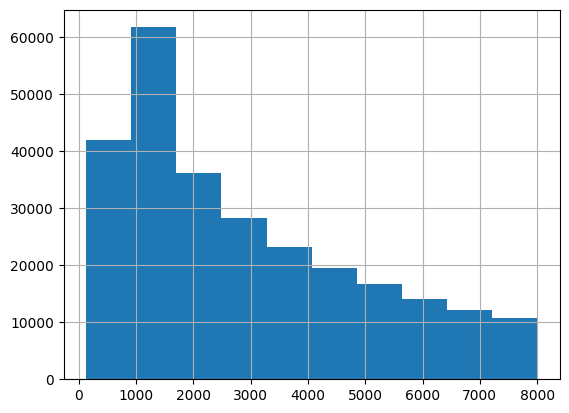

In [ ]:
df["num_tokens"].hist()

In [ ]:
df["id"] = df.index

In [ ]:
df.isna().sum()

messages      0
num_tokens    0
source        0
question      0
content       0
thinking      0
answer        0
id            0
dtype: int64

In [ ]:
for i in ["question", "thinking", "answer", "id"]:
    print(i, "空白",len(df[df[i]== ""]))
    print(i, "None",df[i].isna().sum())
    print(i, "重複", df[i].duplicated().sum())

question 空白 0
question None 0
question 重複 133125
thinking 空白 0
thinking None 0
thinking 重複 74
answer 空白 1
answer None 0
answer 重複 952
id 空白 0
id None 0
id 重複 0


In [ ]:
df.sort_values(by="num_tokens", ascending=False, inplace=True)

In [ ]:
df.drop_duplicates(["question", "answer"], keep="first", inplace=True)

In [ ]:
df[df.duplicated("question")]

messages  num_tokens  \
182749  [{'content': 'What is the approximate distance...        7972   
182893  [{'content': 'How many elastic collisions will...        7936   
86054   [{'content': 'You will be given a competitive ...        7934   
153227  [{'content': 'What is the pH of the solution w...        7927   
169369  [{'content': 'You will be given a competitive ...        7919   
...                                                   ...         ...   
43739   [{'content': 'What catalog of particles was me...         309   
52550   [{'content': 'Where does photosynthesis occur ...         307   
59268   [{'content': 'What does tensing of muscles mea...         306   
135154  [{'content': 'What is the primary component of...         299   
141544  [{'content': 'What is the term for large, soli...         285   

                                             source  \
182749  nvidia/Llama-Nemotron-Post-Training-Dataset   
182893  nvidia/Llama-Nemotron-Post-Training-Dataset   
86054                       open-r1/codeforces-cots   
153227  nvidia/Llama-Nemotron-Post-Training-Dataset   
169369                      open-r1/codeforces-cots   
...                                             ...   
43739   nvidia/Llama-Nemotron-Post-Training-Dataset   
52550   nvidia/Llama-Nemotron-Post-Training-Dataset   
59268   nvidia/Llama-Nemotron-Post-Training-Dataset   
135154  nvidia/Llama-Nemotron-Post-Training-Dataset   
141544  nvidia/Llama-Nemotron-Post-Training-Dataset   

                                                 question  \
182749  What is the approximate distance a photon from...   
182893  How many elastic collisions will occur when ba...   
86054   You will be given a competitive programming pr...   
153227  What is the pH of the solution when 100 cm³ of...   
169369  You will be given a competitive programming pr...   
...                                                   ...   
43739   What catalog of particles was mentioned in the...   
52550   Where does photosynthesis occur in a cactus?A:...   
59268   What does tensing of muscles mean?A: Stretch\n...   
135154  What is the primary component of tendons?A: el...   
141544  What is the term for large, solid sugar crysta...   

                                                  content  \
182749  <think>\nOkay, so the question is about how fa...   
182893  <think>\nAlright, let's tackle this physics pr...   
86054   <think>\nOkay, let's try to figure out this pr...   
153227  <think>\nOkay, so I have this chemistry proble...   
169369  <think>\nOkay, let's try to figure out how to ...   
...                                                   ...   
43739   <think>\nOkay, let's see. The question is aski...   
52550   <think>\nOkay, let's try to figure out where p...   
59268   <think>\nOkay, so I need to figure out what te...   
135154  <think>\nOkay, so I need to figure out what th...   
141544  <think>\nOkay, so the question is asking for t...   

                                                 thinking  \
182749  \nOkay, so the question is about how far a pho...   
182893  \nAlright, let's tackle this physics problem. ...   
86054   \nOkay, let's try to figure out this problem. ...   
153227  \nOkay, so I have this chemistry problem here ...   
169369  \nOkay, let's try to figure out how to solve t...   
...                                                   ...   
43739   \nOkay, let's see. The question is asking whic...   
52550   \nOkay, let's try to figure out where photosyn...   
59268   \nOkay, so I need to figure out what tensing o...   
135154  \nOkay, so I need to figure out what the prima...   
141544  \nOkay, so the question is asking for the term...   

                                                   answer      id  
182749  The problem involves determining the approxima...  182749  
182893  The problem involves determining the number of...  182893  
86054   ```cpp\n#include <bits/stdc++.h>\nusing namesp...   86054  
153227  To determine the pH of the solut

In [ ]:
df["thinking"] = "<think>\n" + df["thinking"] + "\n</think>"
# df["content"] = df["thinking"] + "\n\n\n\n" + df["answer"]
df.head()

messages  num_tokens  \
199929  [{'content': 'You will be given a competitive ...        7999   
260386  [{'content': 'You will be given a competitive ...        7999   
158402  [{'content': 'You will be given a competitive ...        7999   
102054  [{'content': 'Let $x_{0}, x_{1}, \cdots, x_{n}...        7999   
136819  [{'content': 'You will be given a competitive ...        7999   

                          source  \
199929   open-r1/codeforces-cots   
260386   open-r1/codeforces-cots   
158402   open-r1/codeforces-cots   
102054  open-r1/OpenR1-Math-220k   
136819   open-r1/codeforces-cots   

                                                 question  \
199929  You will be given a competitive programming pr...   
260386  You will be given a competitive programming pr...   
158402  You will be given a competitive programming pr...   
102054  Let $x_{0}, x_{1}, \cdots, x_{n}$ be positive ...   
136819  You will be given a competitive programming pr...   

                                                  content  \
199929  <think>\nOkay, I need to solve this problem wh...   
260386  <think>\nOkay, I need to solve this problem wh...   
158402  <think>\nOkay, let's see. The problem is about...   
102054  <think>\nAlright, so I have this problem where...   
136819  <think>\nOkay, I need to solve this problem wh...   

                                                 thinking  \
199929  <think>\n\nOkay, I need to solve this problem ...   
260386  <think>\n\nOkay, I need to solve this problem ...   
158402  <think>\n\nOkay, let's see. The problem is abo...   
102054  <think>\n\nAlright, so I have this problem whe...   
136819  <think>\n\nOkay, I need to solve this problem ...   

                                                   answer      id  
199929  ```cpp\n#include <bits/stdc++.h>\nusing namesp...  199929  
260386  ```cpp\n#include <iostream>\n#include <unorder...  260386  
158402  ```cpp\n#include <iostream>\n#include <algorit...  158402  
102054  To find the maximum value of \( S_n \), we nee...  102054  
136819  ```cpp\n#include <bits/stdc++.h>\nusing namesp...  136819

In [ ]:
# 漢字が含まれる行を抽出、削除する準備
mask = df["content"].str.contains(r'[\u4e00-\u9fff]', na=False)

print(len(df[mask]))

han = r'[\u4e00-\u9fff]'
trigger = df["content"].str.extract(r'(' + han + r')', expand=False)
debug_df = pd.DataFrame({"content": df["content"], "trigger": trigger})
debug_df[debug_df["trigger"].notna()].head(20)

661


content trigger
101222  <think>\nOkay, let's see. I need to find the v...       的
254797  <think>\nAlright, let's try to figure out this...       錯
53967   <think>\nOkay, so the problem here is about an...       电
203246  <think>\nOkay, so there's this problem about a...       假
217845  <think>\n嗯，好的，我现在要解决这个问题。题目是说有16个小三角形房间，两个人A和B...       嗯
193007  <think>\nOkay, so I need to figure out the inc...       转
68691   <think>\nOkay, let me think through this quest...       选
111590  <think>\n嗯，我现在遇到了一个数学问题，需要仔细思考一下才能解决。题目是：找到一个最...       嗯
17574   <think>\nOkay, let's see. The problem is askin...       上
216877  <think>\nOkay, so I've got this chemistry prob...       混
110172  <think>\nOkay, so I need to figure out whether...       满
161009  <think>\nOkay, so I need to find the gradient ...       自
178695  <think>\nOkay, let's see. The question is abou...       混
121936  <think>\nAlright, so I've got this question he...       压
103727  <think>\nOkay, let's try to tackle this proble...       理
170965  <think>\n嗯，我现在要解决这个问题：在钟面上重新排列1到12这12个整数，使得任何三...       嗯
190110  <think>\nOkay, let me try to figure this probl...       元
146357  <think>\n嗯，这个问题是说，你需要离一个黑洞合并多近才能在不借助任何仪器的情况下感知...       嗯
129913  <think>\nOkay, let's tackle this quantum mecha...       模
162786  <think>\nOkay, so I have this question about t...       実

In [ ]:
df = df[~mask]

In [ ]:
# 'content'列に "http:" または "https:" が含まれない行を抽出
df = df[~(df['content'].str.contains("http:", na=False) | df['content'].str.contains("https:", na=False))]

In [ ]:
df["source"].value_counts()

source
nvidia/Llama-Nemotron-Post-Training-Dataset    169528
open-r1/OpenR1-Math-220k                        69113
open-r1/codeforces-cots                         23819
Name: count, dtype: int64

In [ ]:
# 念の為もう一回並べ替えやっておく
df.sort_values(by="num_tokens", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

messages  num_tokens  \
0  [{'content': 'You will be given a competitive ...        7999   
1  [{'content': 'What does the absence of time de...        7999   
2  [{'content': 'You will be given a competitive ...        7999   
3  [{'content': '2. Solve the inequality for $x$:...        7999   
4  [{'content': 'You will be given a competitive ...        7999   

                                        source  \
0                      open-r1/codeforces-cots   
1  nvidia/Llama-Nemotron-Post-Training-Dataset   
2                      open-r1/codeforces-cots   
3                     open-r1/OpenR1-Math-220k   
4                      open-r1/codeforces-cots   

                                            question  \
0  You will be given a competitive programming pr...   
1  What does the absence of time derivatives for ...   
2  You will be given a competitive programming pr...   
3  2. Solve the inequality for $x$: $\log _{a}\le...   
4  You will be given a competitive programming pr...   

                                             content  \
0  <think>\nOkay, I need to solve this problem wh...   
1  <think>\nAlright, so I need to figure out what...   
2  <think>\nOkay, I need to solve this problem wh...   
3  <think>\nOkay, let me try to solve this inequa...   
4  <think>\nOkay, let's see. So the problem is ab...   

                                            thinking  \
0  <think>\n\nOkay, I need to solve this problem ...   
1  <think>\n\nAlright, so I need to figure out wh...   
2  <think>\n\nOkay, I need to solve this problem ...   
3  <think>\n\nOkay, let me try to solve this ineq...   
4  <think>\n\nOkay, let's see. So the problem is ...   

                                              answer      id  
0  ```cpp\n#include <bits/stdc++.h>\nusing namesp...  199929  
1  The absence of time derivatives for the field ...   79756  
2  ```cpp\n#include <iostream>\n#include <unorder...  260386  
3  To solve the inequality \(\log _{a}\left(x^{2}...  107958  
4  ```cpp\n#include <iostream>\nusing namespace s...   76925

In [ ]:
df_science = df[df["source"] == "nvidia/Llama-Nemotron-Post-Training-Dataset"]
df_math = df[df["source"] == "open-r1/OpenR1-Math-220k"]
df_code = df[df["source"] == "open-r1/codeforces-cots"]

sample_num = 44000

subject_targets = {
    'nvidia/Llama-Nemotron-Post-Training-Dataset': int(sample_num * 173 / (173 + 93.7 + 83.1)),
    'open-r1/OpenR1-Math-220k': int(sample_num * 93.7 / (173 + 93.7 + 83.1)),
    'open-r1/codeforces-cots': int(sample_num * 83.1 / (173 + 93.7 + 83.1))
}

print(subject_targets)

df_part = pd.concat([
    df_science.sample(subject_targets['nvidia/Llama-Nemotron-Post-Training-Dataset']),
    df_math.sample(subject_targets['open-r1/OpenR1-Math-220k']),
    df_code.sample(subject_targets['open-r1/codeforces-cots'])
])

df_part.reset_index(drop=True, inplace=True)
df_part = df_part[["id", "question", "thinking", "content", "answer", "source"]]

{'nvidia/Llama-Nemotron-Post-Training-Dataset': 21761, 'open-r1/OpenR1-Math-220k': 11786, 'open-r1/codeforces-cots': 10452}


In [ ]:
df_part

id                                           question  \
0      164136  At what speed must you travel to experience 36...   
1      174689  What is the value of \( K_\mathrm{b} \) for \(...   
2      215833  Would a pilot in a small, mobile spaceship fee...   
3      141362  Which releases more energy: the combustion of ...   
4       21616  What supports the weight of the boat in the Go...   
...       ...                                                ...   
43994   61051  You will be given a competitive programming pr...   
43995  115422  You will be given a competitive programming pr...   
43996  228447  You will be given a competitive programming pr...   
43997  211019  You will be given a competitive programming pr...   
43998  227764  You will be given a competitive programming pr...   

                                                thinking  \
0      <think>\n\nOkay, so I've got this physics prob...   
1      <think>\n\nOkay, so I need to find the value o...   
2      <think>\n\nOkay, so I need to figure out wheth...   
3      <think>\n\nOkay, let me try to figure this pro...   
4      <think>\n\nOkay, let me try to figure out this...   
...                                                  ...   
43994  <think>\n\nOkay, let's try to figure out this ...   
43995  <think>\n\nOkay, let's tackle this problem. So...   
43996  <think>\n\nOkay, let's see. The problem is abo...   
43997  <think>\n\nOkay, let's see. The problem is to ...   
43998  <think>\n\nOkay, let's see. The problem is to ...   

                                                 content  \
0      <think>\nOkay, so I've got this physics proble...   
1      <think>\nOkay, so I need to find the value of ...   
2      <think>\nOkay, so I need to figure out whether...   
3      <think>\nOkay, let me try to figure this probl...   
4      <think>\nOkay, let me try to figure out this q...   
...                                                  ...   
43994  <think>\nOkay, let's try to figure out this pr...   
43995  <think>\nOkay, let's tackle this problem. So, ...   
43996  <think>\nOkay, let's see. The problem is about...   
43997  <think>\nOkay, let's see. The problem is to de...   
43998  <think>\nOkay, let's see. The problem is to fi...   

                                                  answer  \
0      To determine the speed required for a traveler...   
1      To determine the value of \( K_\mathrm{b} \) f...   
2      The pilot would experience g-forces during acc...   
3      To determine which reaction releases more ener...   
4      The Gouwe Aqueduct is a navigable aqueduct, wh...   
...                                                  ...   
43994  ```python\nn = int(input())\na = [int(input())...   
43995  ```cpp\n#include <bits/stdc++.h>\nusing namesp...   
43996  ```cpp\n#include <iostream>\n#include <algorit...   
43997  ```cpp\n#include <bits/stdc++.h>\nusing namesp...   
43998  ```cpp\n#include <iostream>\n#include <climits...   

                                            source  
0      nvidia/Llama-Nemotron-Post-Training-Dataset  
1      nvidia/Llama-Nemotron-Post-Training-Dataset  
2      nvidia/Llama-Nemotron-Post-Training-Dataset  
3      nvidia/Llama-Nemotron-Post-Training-Dataset  
4      nvidia/Llama-Nemotron-Post-Training-Dataset  
...                                            ...  
43994                      open-r1/codeforces-cots  
43995                      open-r1/codeforces-cots  
43996                      open-r1/codeforces-cots  
43997                      open-r1/codeforces-cots  
43998                      open-r1/codeforces-cots  

[43999 rows x 6 columns]

In [ ]:
# "answer"の重複は許容できるか
for i in ["question", "thinking", "content", "answer","id"]:
    print(i, "空白",len(df_part[df_part[i]== ""]))
    print(i, "None",df_part[i].isna().sum())
    print(i, "重複", df_part[i].duplicated().sum())

question 空白 0
question None 0
question 重複 7396
thinking 空白 0
thinking None 0
thinking 重複 12
content 空白 0
content None 0
content 重複 0
answer 空白 0
answer None 0
answer 重複 60
id 空白 0
id None 0
id 重複 0


## 以下は一旦、実行しなくていいです

In [ ]:
dataset = Dataset.from_pandas(df_part)

In [ ]:
from datasets import DatasetDict

hf_token = ""
login(token=hf_token)

In [ ]:
# dataset_name は適宜変更
dataset_name = "MixtureOfThoughts_44000"

train_test_split = dataset.train_test_split(test_size=0.1, seed=42)

# Access the training and validation sets
train_ds = train_test_split['train']
val_ds = train_test_split['test']

combined_ds = DatasetDict({
    'train': train_ds,
    'validation': val_ds
})

dataset = combined_ds

In [ ]:
dataset.push_to_hub(f"suzakuteam/{dataset_name}", commit_message="Sort_by_str_len.Drop_False_tag.")

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  524kB /  203MB            

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   1%|1         | 2.10MB /  203MB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 1.05MB / 45.4MB            

CommitInfo(commit_url='https://huggingface.co/datasets/suzakuteam/MixtureOfThoughts_44000/commit/706a3c7cb9ef73d7bfb4b776a4e0bdde5962284b', commit_message='Sort_by_str_len.Drop_False_tag.', commit_description='', oid='706a3c7cb9ef73d7bfb4b776a4e0bdde5962284b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/suzakuteam/MixtureOfThoughts_44000', endpoint='https://huggingface.co', repo_type='dataset', repo_id='suzakuteam/MixtureOfThoughts_44000'), pr_revision=None, pr_num=None)

In [ ]:
print(f"suzakuteam/{dataset_name}")

suzakuteam/MixtureOfThoughts_44000


In [ ]:
uploaded_ds = load_dataset(f"suzakuteam/{dataset_name}")
uploaded_df = pd.DataFrame(uploaded_ds["train"])
print(uploaded_df.shape)
display(uploaded_df.head())
display(uploaded_df.tail())

README.md:   0%|          | 0.00/595 [00:00<?, ?B/s]

data/train-00000-of-00002.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

data/train-00001-of-00002.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/45.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/39599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4400 [00:00<?, ? examples/s]

(39599, 6)


id                                           question  \
0    1243  What should be the mass \( M \) of a body fixe...   
1   82789  Which ion has a larger ionic radius, Ca2+ or M...   
2  207411  Let $a$ be a real number and $b$ be a real num...   
3   39487  G7.1 There are $a$ zeros at the end of the pro...   
4  166960  In uniform circular motion, is there tangentia...   

                                            thinking  \
0  <think>\n\nOkay, let's see... The problem is a...   
1  <think>\n\nOkay, let's see. The question is as...   
2  <think>\n\nOkay, let's see. I need to find all...   
3  <think>\n\nOkay, so I need to figure out how m...   
4  <think>\n\nOkay, so the question here is about...   

                                             content  \
0  <think>\nOkay, let's see... The problem is abo...   
1  <think>\nOkay, let's see. The question is aski...   
2  <think>\nOkay, let's see. I need to find all r...   
3  <think>\nOkay, so I need to figure out how man...   
4  <think>\nOkay, so the question here is about u...   

                                              answer  \
0  To determine the mass \( M \) required at the ...   
1  The ionic radius increases when moving down a ...   
2  To determine all pairs \((a, b)\) for which th...   
3  To determine the number of trailing zeros in t...   
4  In uniform circular motion, the speed of the o...   

                                        source  
0  nvidia/Llama-Nemotron-Post-Training-Dataset  
1  nvidia/Llama-Nemotron-Post-Training-Dataset  
2                     open-r1/OpenR1-Math-220k  
3                     open-r1/OpenR1-Math-220k  
4  nvidia/Llama-Nemotron-Post-Training-Dataset

id                                           question  \
39594   90220  You will be given a competitive programming pr...   
39595   12684  What is an effective method to remove chlorami...   
39596  241671  Could humans have breathed during the period w...   
39597   16563  $\frac{3}{2}+\frac{5}{4}+\frac{9}{8}+\frac{17}...   
39598  127957  Are the two definitions of the one-body reduce...   

                                                thinking  \
39594  <think>\n\nOkay, let's try to understand the p...   
39595  <think>\n\nOkay, so I need to figure out which...   
39596  <think>\n\nAlright, so I need to figure out wh...   
39597  <think>\n\nOkay, so I have this math problem h...   
39598  <think>\n\nOkay, let's tackle this question ab...   

                                                 content  \
39594  <think>\nOkay, let's try to understand the pro...   
39595  <think>\nOkay, so I need to figure out which m...   
39596  <think>\nAlright, so I need to figure out whet...   
39597  <think>\nOkay, so I have this math problem her...   
39598  <think>\nOkay, let's tackle this question abou...   

                                                  answer  \
39594  ```cpp\n#include <bits/stdc++.h>\nusing namesp...   
39595  To determine an effective method for removing ...   
39596  During the Carboniferous period, atmospheric o...   
39597  To solve the problem \(\frac{3}{2} + \frac{5}{...   
39598  The one-body reduced density matrix (RDM) is a...   

                                            source  
39594                      open-r1/codeforces-cots  
39595  nvidia/Llama-Nemotron-Post-Training-Dataset  
39596  nvidia/Llama-Nemotron-Post-Training-Dataset  
39597                     open-r1/OpenR1-Math-220k  
39598  nvidia/Llama-Nemotron-Post-Training-Dataset